# Investigating Shooting Tendencies in the Modern Era of Basketball.
_by Santiago Eduardo Poblete Talamante_

## Evolution of scoring in the NBA ## 
As previously mentioned, scoring in the NBA has changed a lot throughout the decades. I'll make a comparison of shooting percentages and attempts since 1979. Also I’ll compare the performance of the most recognized shooters of each era starting from the 80’s.

### Three point percentage and attempts throughout the years ###
Shooting has evolved in many ways since it was first added to the toolset of the players in 1967; it was stated by then ABA commissioner George Mikan that the line was added to “[…]give the smaller player a chance to score and open up the defense to make the game more enjoyable to fans”.

 The shooting percentage has had an impressive trajectory. When I started this investigation I assumed that the three point shooting percentage would see a similar pattern to its attempts, I was wrong.

_We'll go step by step on how we made our predictions using python_

#### 1. Import Libraries 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#### 2. Import game data

In [10]:
games = pd.read_csv('../csv/game.csv')

#### 3. Cleaning our data
Now we'll clean our data, we'll remove games that are missing 3pt data and games that occurred before 1979.

In [11]:
# remove games with missing data

games = games.dropna(subset=['fg3a_home', 'fg3a_away', 'fg3_pct_home', 'fg3_pct_away', 'pts_home', 'pts_away'])

# remove games previous to 1979

games = games[games['game_date'] > '1979-01-01 00:00:00']

#### 4. Processing our data

At this point all we have to do is make some processing of our data to make our predictions.

##### A. Getting average summ of 3pt % each year #####

This will allow us to see how the 3pt % has changed throughout the years.

In [12]:
games['game_date'] = pd.to_datetime(games['game_date'])

games['year'] = games['game_date'].dt.year

avg_3pt_percentage = games.groupby('year').agg({'fg3_pct_home':'mean', 'fg3_pct_away':'mean'}).reset_index()

avg_3pt_percentage['avg3pt_percentage'] = (avg_3pt_percentage['fg3_pct_home'] + avg_3pt_percentage['fg3_pct_away'])/2

# Add new column with the that goes from 1 to the number of years

avg_3pt_percentage['year_number'] = range(1, len(avg_3pt_percentage) + 1)

##### B. Logarithmic and Polynomial fit #####

We'll attempt a Logarithmic and Polynomial fit using the numpy and scikit-learn library to see if it fits well the data.

In [13]:
# Logarithmic fit

x = avg_3pt_percentage['year_number'].values.reshape(-1, 1)

y = avg_3pt_percentage['avg3pt_percentage'].values

model = LinearRegression()

model.fit(np.log(x), y)

avg_3pt_percentage['log_fit'] = model.predict(np.log(x))

# Polynomial fit

x = avg_3pt_percentage['year_number'].values.reshape(-1, 1).flatten()

y = avg_3pt_percentage['avg3pt_percentage'].values

poly_fit = np.polyfit(x, y, 4)

avg_3pt_percentage['poly_fit'] = np.polyval(poly_fit, x)



##### C. R2 score #####

Let's see how good each function fits the current data.

In [14]:
r2_log = round(r2_score(y, avg_3pt_percentage['log_fit']),2)

r2_poly = round(r2_score(y, avg_3pt_percentage['poly_fit']), 2)

print(f'R2 score for logarithmic fit: {r2_log}')

print(f'R2 score for polynomial fit: {r2_poly}')

R2 score for logarithmic fit: 0.88
R2 score for polynomial fit: 0.93


In [15]:
# Get model coefficients for poly and log fits

print(f'Poly fit coefficients: {poly_fit}')

print(f'Log fit coefficients: {model.coef_}')

# Apply the model to the numbers 45-51 (2024-2030) season

new_poly_fit = np.polyval(poly_fit, range(1, 52))

new_log_fit = model.predict(np.log(np.array(range(1, 52)).reshape(-1, 1)))

# Add 0 to the array of 3pt percentage

new_3pt_percentage_array = avg_3pt_percentage['avg3pt_percentage'].values

new_3pt_percentage_array = np.append(new_3pt_percentage_array, [0.36049610389610387]*7)

# Concat 2024-2030 season to the dataframe

new_data = pd.DataFrame({'year': range(1979, 2030) ,'year_number': range(1, 52), 'poly_fit': new_poly_fit, 'log_fit': new_log_fit, 'avg3pt_percentage': new_3pt_percentage_array})

# Save the dataframe to a csv file

new_data.to_csv('../csv/avg_3pt_percentage.csv', index=False)

Poly fit coefficients: [-1.97919298e-07  2.65754840e-05 -1.28878193e-03  2.70800998e-02
  1.40882477e-01]
Log fit coefficients: [0.05358165]


##### D. Plotting our results #####

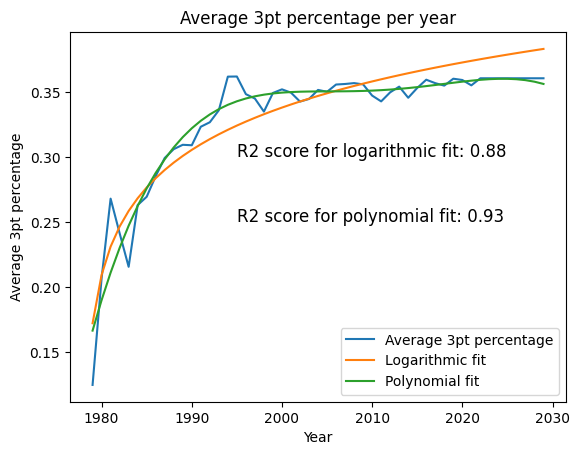

In [16]:
# plot average 3pt percentage per year

plt.plot(new_data['year'], new_data['avg3pt_percentage'], label='Average 3pt percentage')

plt.plot(new_data['year'], new_data['log_fit'], label='Logarithmic fit')

plt.plot(new_data['year'], new_data['poly_fit'], label='Polynomial fit')

plt.xlabel('Year')

plt.ylabel('Average 3pt percentage')

plt.title('Average 3pt percentage per year')

# Add R2 scores to the plot

plt.text(1995, 0.30, f'R2 score for logarithmic fit: {r2_log}', fontsize=12)

plt.text(1995, 0.25, f'R2 score for polynomial fit: {r2_poly}', fontsize=12)

plt.legend()

plt.savefig('../photos/avg3ptpercentage2.png')

#### 5. Conclusion ####
The 3 point percentage has remained stagnant since the start of the 2000s. This tells me that the league as a whole hasn’t gotten better at shooting three point shots, but started valuing the three pointer as tool more.

I made a prediction using various python libraries. I ended up finding that a polynomial approximation was the best fit to predict the 2023-2024 season 3pt percentage. My model says that in the years 2024 through 2029 the averages will remain around 0.36~ which to this date (Nov 15th 2024) matches the current league percentage of 0.35.

I feel confident to affirm that the average won’t change as long as we remain with the same ruling. The only thing that could break this current status quo could be to add back zone defense pushing players outside the paint and turning the three point shot as prolific as layups.